In [18]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [19]:
%ls

 Volume in drive C is Acer
 Volume Serial Number is 70D2-9BA1

 Directory of c:\Users\melan\shared-folder\Thesis\SSL-for-Quantum-Cirucits-Generation\QCCL\notebooks

20/10/2024  14:17    <DIR>          .
28/09/2024  22:20    <DIR>          ..
24/09/2024  20:19         5,736,098 best_model.pth
24/09/2024  20:18               787 hyperparam_tuning_results_with_configs.yaml
11/10/2024  11:46           132,935 training.ipynb
24/09/2024  20:19            24,818 training_best_history.png
24/09/2024  19:59           204,856 training_byol big embedding.ipynb
14/10/2024  13:11           247,018 training_byol.ipynb
19/09/2024  17:50           248,587 training_norms_visual.ipynb
01/10/2024  08:38           441,652 training-visual.ipynb
21/10/2024  17:03            62,212 transforms_debugging.ipynb
               9 File(s)      7,098,963 bytes
               2 Dir(s)  85,552,685,056 bytes free


In [20]:
from qiskit import QuantumCircuit
from Data.QuantumCircuitGraph import QuantumCircuitGraph

In [21]:
# Settings

GATE_TYPE_MAP = {
    'cx': 0, 
    'h': 1, 
    'x': 2,
    'z': 3,
    't': 4
    # Add here all possible gate types
} # map gate type to index in one-hot encoding
# add id always in last position
GATE_TYPE_MAP['id'] = len(GATE_TYPE_MAP)


QuantumCircuitGraph.set_gate_type_map(GATE_TYPE_MAP)
QuantumCircuitGraph.set_include_params(False)
QuantumCircuitGraph.set_include_identity_gates(False)
QuantumCircuitGraph.set_differentiate_cx(True)
QuantumCircuitGraph.set_node_order(None)


print("Modified GATE_TYPE_MAP:", QuantumCircuitGraph.GATE_TYPE_MAP)
print("Modified include_params:", QuantumCircuitGraph.include_params)
print("Modified include_identity_gates:", QuantumCircuitGraph.include_identity_gates)
print("Modified differentiate_cx:", QuantumCircuitGraph.differentiate_cx)

Modified GATE_TYPE_MAP: {'cx': 0, 'h': 1, 'x': 2, 'z': 3, 't': 4, 'id': 5}
Modified include_params: False
Modified include_identity_gates: False
Modified differentiate_cx: True


### Test AddIdentityGatesTransformation

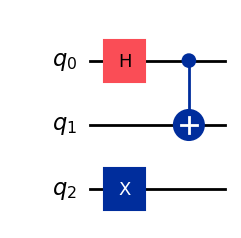

In [22]:
# Create a simple quantum circuit
num_qubits = 3
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.x(2)

# Visualize the initial quantum circuit
qc.draw('mpl')

In [23]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [24]:
from QCCL.transformations import AddIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = AddIdentityGatesTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Transformed Circuit:


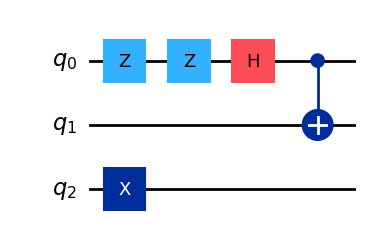

In [25]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test RemoveIdentityGatesTransformation

In [26]:
from QCCL.transformations import RemoveIdentityGatesTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
reverse_transformation = RemoveIdentityGatesTransformation(transformed_qcg)

# Apply the transformation
transformed_qcg = reverse_transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Matching subgraphs: [{'z_0_0': 'z_0_0', 'z_0_1': 'z_0_1'}]
Matching key: None
Matching subgraph selected: {'z_0_0': 'z_0_0', 'z_0_1': 'z_0_1'}
Current operations: [(Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0),), ()), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), ()), (Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), (Qubit(QuantumRegister(3, 'q'), 2),), ())]
Graph nodes: ['z_0_0', 'z_0_1', 'h_0_2', 'cx_0_control_3', 'cx_1_target_3', 'x_2_4']
Graph to circuit mapping: {'z_0_0': 0, 'z_0_1': 1, 'h_0_2': 2, 'cx_0_control_3': 3, 'cx_1_target_3': 3, 'x_2_4': 4}
Matching indices: [0, 1]
Transformed operations: [(Instruction(name='h


Transformed Circuit:


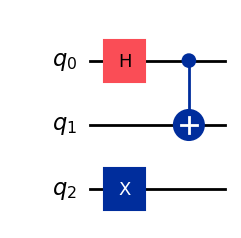

In [27]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

### Test SwapControlTargetTransformation


1st PATTERN: CNOT -> CNOT -> H, H, CNOT, H, H

Original Circuit:


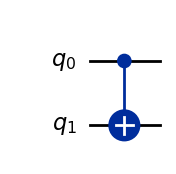

In [35]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [36]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [37]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit


Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x0000020A863F7A40>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000020A9ECEBC20>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000020A9E89E2D0>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000020A9E97F320>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000020A9EC91190>)]
Matching subgraphs: [{'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}]
Matching key: cx
Matching subgraph selected: {'cx_0_control_0': 'cx_0_control_0', 'cx_1_target_0': 'cx_1_target_0'}
Graph nodes: ['cx_0_control_0', 'cx_1_target_0']
Transformed operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1), Qub


Transformed Circuit:


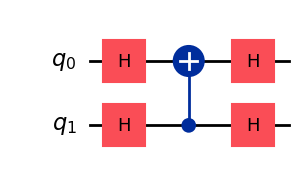

In [38]:

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: CNOT, H, H -> H, H, CNOT

Original Circuit:


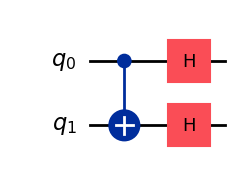

In [46]:
qc = QuantumCircuit(2)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)
qc.h(1)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

In [43]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

In [44]:
from QCCL.transformations import SwapControlTargetTransformation

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation

transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x0000020A9FF2D910>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000020A9EC53770>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000020A9FF078C0>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000020A9EC91220>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000020A9E873590>)]
Matching subgraphs: [{'h_0_0': 'h_0_0', 'cx_0_control_2': 'cx_0_control_2', 'cx_1_target_2': 'cx_1_target_2', 'h_1_1': 'h_1_1'}]
Matching key: h-h-cx
Matching subgraph selected: {'h_0_0': 'h_0_0', 'cx_0_control_2': 'cx_0_control_2', 'cx_1_target_2': 'cx_1_target_2', 'h_1_1': 'h_1_1'}
Graph nodes: ['h_0_0', 'h_1_1', 'cx_0_control_2', 'cx_1_target_2', 'h_0_3', 'h_1_4']
Transformed operations: [(Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumRegister(2, 'q'), 0)], []), (Instruction(name='h', num_qubits=1, num_clbits=0, params=[]


Transformed Circuit:


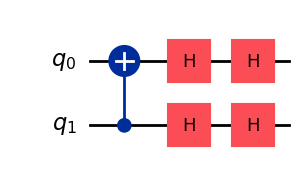

In [45]:
# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')

2nd PATTERN: H, CNOT, H -> H, CNOT, H

Original Circuit:


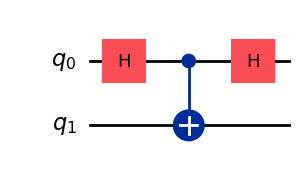

In [50]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)  # Add CNOT gate
qc.h(0)

# Display the original circuit
print("Original Circuit:")
qc.draw(output='mpl')

Pattern subgraph: [('cx', <networkx.classes.digraph.DiGraph object at 0x0000020AA0152000>), ('h-h-cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000020A9EA61190>), ('h-h-cx', <networkx.classes.digraph.DiGraph object at 0x0000020AA00F29F0>), ('cx-h-h', <networkx.classes.digraph.DiGraph object at 0x0000020AA011F6B0>), ('h-cx-h', <networkx.classes.digraph.DiGraph object at 0x0000020A9EC91220>)]
Matching subgraphs: [{'h_0_0': 'h_0_0', 'cx_0_control_1': 'cx_0_control_1', 'cx_1_target_1': 'cx_1_target_1', 'h_0_2': 'h_0_2'}]
Matching key: h-cx-h
Matching subgraph selected: {'h_0_0': 'h_0_0', 'cx_0_control_1': 'cx_0_control_1', 'cx_1_target_1': 'cx_1_target_1', 'h_0_2': 'h_0_2'}
Graph nodes: ['h_0_0', 'cx_0_control_1', 'cx_1_target_1', 'h_0_2']
Transformed operations: [(Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1)], []), (Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), [Qubit(QuantumRegister(2, 'q'), 1), Qubit(QuantumR

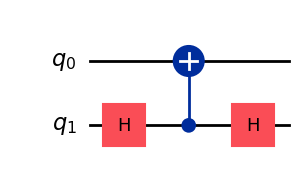

In [51]:
# Convert to graph representation
qcg = QuantumCircuitGraph(qc)

# Create an instance of the SwapControlTargetTransformation class and apply it
transformation = SwapControlTargetTransformation(qcg)

# Apply the transformation
transformed_qcg = transformation.apply()  # Applying the transformation
transformed_circuit = transformed_qcg.quantum_circuit  # Extract the transformed circuit

# Display the transformed circuit
print("\nTransformed Circuit:")
transformed_circuit.draw(output='mpl')